In [1]:
from google.colab import files
uploaded = files.upload()

Saving data2.xlsx to data2.xlsx


In [44]:
import pandas as pd
import numpy as np
import cmath as math
import matplotlib.pyplot as plt

In [51]:
data = pd.read_excel('data2.xlsx', header = None)

In [5]:
def normalize(X):
  Z = (X-X.min())/(X.max() - X.min())
  return Z

In [13]:
### function to calculate distance between 2 points
def dist(x, y):
  n = x.shape[0]
  sum = 0
  for i in range(n):
    sum = sum + (x[i] - y[i])**2
  return (math.sqrt(sum)).real

In [9]:
### function to calculate distance between data and centroids
def dist_from_cen(data, cen):
  dist1 = [0 for i in range(len(data))]
  dist2 = [0 for i in range(len(data))]
  dist3 = [0 for i in range(len(data))]

  for i in range(len(data)):
    dist1[i] = dist(data.iloc[i,:], cen[0])
    dist2[i] = dist(data.iloc[i,:], cen[1])
    dist3[i] = dist(data.iloc[i,:], cen[2])
  
  return dist1, dist2, dist3

In [39]:
### function to assign data to different clusters
def assign_cluster(data, d1, d2, d3):
  clust1 = pd.DataFrame()
  clust2 = pd.DataFrame()
  clust3 = pd.DataFrame()
  cluster_list = [0 for i in range(len(data))]

  for i in range(len(data)):
    if(min(d1[i], d2[i], d3[i]) == d1[i]):
      cluster_list[i] = 1
      clust1 = clust1.append(data.iloc[i,:])
    elif(min(d1[i], d2[i], d3[i]) == d2[i]):
      cluster_list[i] = 2
      clust2 = clust2.append(data.iloc[i,:])
    else:
      cluster_list[i] = 3
      clust3 = clust3.append(data.iloc[i,:])

    
  
  clust1 = clust1.reset_index(drop = True)
  clust2 = clust2.reset_index(drop = True)
  clust3 = clust3.reset_index(drop = True)

  return clust1, clust2, clust3, cluster_list

In [36]:
### function to update centroids
def update_cen(clust1, clust2, clust3):
  cen = [clust1.mean(axis = 0), clust2.mean(axis = 0), clust3.mean(axis = 0)]
  return cen

In [42]:
#### clustering
def cluster(data, num_iter = 50):
  cen = [data.iloc[i,:] for i in range(3)]                  ##initialize the centroid
  for i in range(num_iter):
    d1, d2, d3 = dist_from_cen(data, cen)                   ## calculate distance of data from centroid
    c1, c2, c3, clist = assign_cluster(data, d1, d2, d3)    ### assign cluster to data
    cen = update_cen(c1, c2, c3)                            ### update centroid

  return clist                                              ##return list of cluster labels

In [53]:
### normalize the data
data_norm = normalize(data)

In [72]:
c_list = cluster(data_norm, num_iter = 1000)

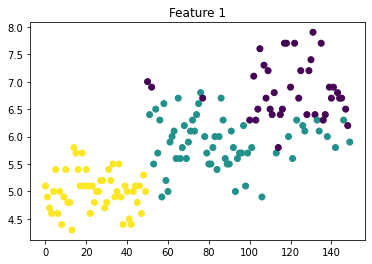

In [73]:
plt.scatter(np.arange(len(data.iloc[:,0])),data.iloc[:,0],c=c_list)
plt.title('Feature 1')
plt.show()

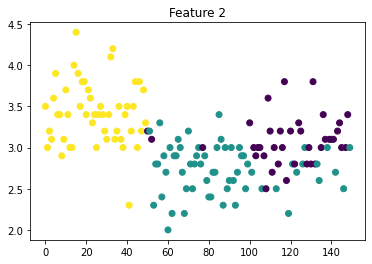

In [74]:
plt.scatter(np.arange(len(data.iloc[:,1])),data.iloc[:,1],c=c_list)
plt.title('Feature 2')
plt.show()

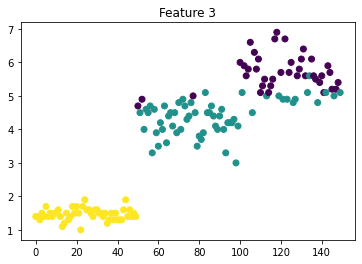

In [75]:
plt.scatter(np.arange(len(data.iloc[:,2])),data.iloc[:,2],c=c_list)
plt.title('Feature 3')
plt.show()

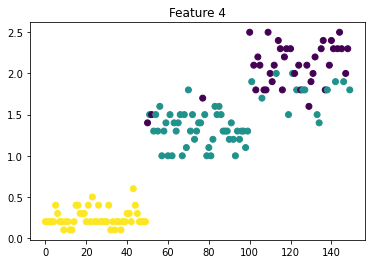

In [76]:
plt.scatter(np.arange(len(data.iloc[:,3])),data.iloc[:,3],c=c_list)
plt.title('Feature 4')
plt.show()